In [5]:
import pandas as pd
!pip install yfinance
import yfinance as yf
import matplotlib.pyplot as plt


In [6]:
df=yf.download('AAPL',start='2019-01-01')


[*********************100%***********************]  1 of 1 completed


In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,39.632500,39.840000,39.119999,39.435001,38.282608,140014000
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.326290,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.508713,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.981861,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.901775,219111200


In [8]:
df['MA20']=df['Adj Close'].rolling(20).mean()
df['MA50']=df['Adj Close'].rolling(50).mean()
df

,Open,High,Low,Close,Adj Close,Volume,MA20,MA50
Date,,,,,,,,
2018-12-31,39.632500,39.840000,39.119999,39.435001,38.282608,140014000,NaN,NaN
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.326290,148158800,NaN,NaN
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.508713,365248800,NaN,NaN
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.981861,234428400,NaN,NaN
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.901775,219111200,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-12-14,175.250000,177.740005,172.210007,174.330002,174.330002,139380400,164.783001,154.310588
2021-12-15,175.110001,179.500000,172.309998,179.300003,179.300003,131063300,166.198001,155.078501
2021-12-16,179.279999,181.139999,170.750000,172.259995,172.259995,150185800,167.136501,155.687840


In [9]:
df=df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume,MA20,MA50
Date,,,,,,,,
2019-03-13,45.562500,45.825001,45.230000,45.427502,44.289135,124130000,42.443685,40.107607
2019-03-14,45.974998,46.025002,45.639999,45.932499,44.781471,94318000,42.608815,40.237585
2019-03-15,46.212502,46.832500,45.935001,46.529999,45.364006,156171600,42.795517,40.378339
2019-03-18,46.450001,47.097500,46.447498,47.005001,45.827099,104879200,43.010004,40.604707
2019-03-19,47.087502,47.247501,46.480000,46.632500,45.463928,126585600,43.200118,40.794348
...,...,...,...,...,...,...,...,...
2021-12-14,175.250000,177.740005,172.210007,174.330002,174.330002,139380400,164.783001,154.310588
2021-12-15,175.110001,179.500000,172.309998,179.300003,179.300003,131063300,166.198001,155.078501
2021-12-16,179.279999,181.139999,170.750000,172.259995,172.259995,150185800,167.136501,155.687840


In [10]:
df=df[['Adj Close','MA20','MA50']]
df

,Adj Close,MA20,MA50
Date,,,
2019-03-13,44.289135,42.443685,40.107607
2019-03-14,44.781471,42.608815,40.237585
2019-03-15,45.364006,42.795517,40.378339
2019-03-18,45.827099,43.010004,40.604707
2019-03-19,45.463928,43.200118,40.794348
...,...,...,...
2021-12-14,174.330002,164.783001,154.310588
2021-12-15,179.300003,166.198001,155.078501
2021-12-16,172.259995,167.136501,155.687840


In [11]:
Buy=[]
Sell=[]
for i in range(len(df)):
  if df.MA20.iloc[i] > df.MA50.iloc[i] and df.MA20.iloc[i-1] < df.MA50.iloc[i-1]:
    Buy.append(i)
  elif df.MA20.iloc[i] < df.MA50.iloc[i] and df.MA20.iloc[i-1] > df.MA50.iloc[i-1]:
    Sell.append(i)


In [12]:
Buy

[76, 286, 418, 529, 578, 669]

In [13]:
Sell

[51, 248, 394, 494, 556, 645]

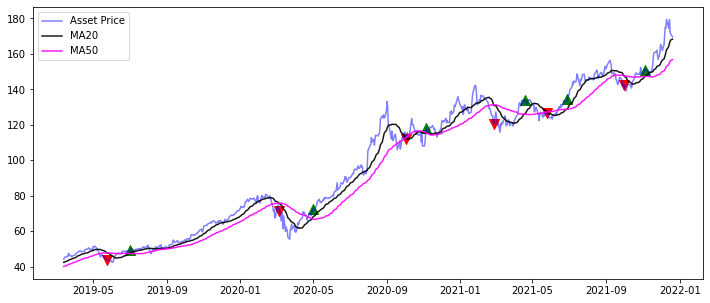

In [14]:
plt.figure(figsize=(12,5))
plt.plot(df['Adj Close'], label='Asset Price' , c='blue', alpha=0.5)
plt.plot(df['MA20'] ,label='MA20', c='black', alpha=0.9)
plt.plot(df['MA50'] , label='MA50', c='magenta', alpha=0.9)
plt.scatter(df.iloc[Buy].index, df.iloc[Buy]['Adj Close'] , marker='^' , color='green', s=100)
plt.scatter(df.iloc[Sell].index, df.iloc[Sell]['Adj Close'] , marker='v' , color='red', s=100)
plt.legend()
plt.show()

In [15]:
excel=pd.read_csv("stock.csv")

In [16]:
excel.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,12-01-2012,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,13-01-2012,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,17-01-2012,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,18-01-2012,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,19-01-2012,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


calculating sharpe ratio

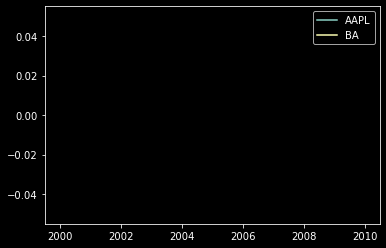

In [36]:
# excel["Date"]=pd.to_datetime(excel["Date"])
# timeperiod=2159 #no of rows in the excel
# excel['AAPLret']=100*(excel["AAPL"]/excel["AAPL"].shift(timeperiod) - 1)
# excel['BAret']=100*(excel["BA"]/excel["BA"].shift(timeperiod) - 1)

# excel["AAPLstd"]=excel["AAPLret"].rolling(timeperiod).std()
# excel["BAstd"]=excel["BAret"].rolling(timeperiod).std()


# excel["AAPLsharpe"]=excel["AAPLret"]/excel["AAPLstd"]
# excel["BAsharpe"]=excel["BAret"]/excel["BAstd"]


# plt.plot(excel["Date"], excel["AAPLsharpe"],label="AAPL")
# plt.plot(excel["Date"], excel["BAsharpe"],label="BA")
# plt.legend()
# plt.show()









calculating sortino ratio

In [102]:
import numpy as np
excel["daily_returnAAPL"]= excel["AAPL"].pct_change()
excel["daily_returnBA"]= excel["BA"].pct_change()

excel["daily_returnT"]= excel["T"].pct_change()

excel["daily_returnMGM"]= excel["MGM"].pct_change()

excel["daily_returnAMZN"]= excel["AMZN"].pct_change()

excel["daily_returnIBM"]= excel["IBM"].pct_change()

excel["daily_returnTSLA"]= excel["TSLA"].pct_change()
excel["daily_returnGOOG"]= excel["GOOG"].pct_change()




excel.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500,...,dd,ddAAPL,dailybench_return,daily_returnBA,daily_returnT,daily_returnMGM,daily_returnAMZN,daily_returnIBM,daily_returnTSLA,daily_returnGOOG
0,2012-12-01,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966,...,-0.003749,-0.003749,-0.004948,-0.012051,-0.001660,0.018137,0.014153,-0.007699,-0.193274,-0.007385
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044,...,NaN,NaN,0.003553,0.008579,0.005986,-0.008097,0.018159,0.004689,0.167179,0.005744
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039,...,NaN,NaN,0.011108,-0.002392,0.002645,0.039184,0.042827,0.005944,0.007895,0.006889
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000,...,-0.003169,-0.003169,0.004939,0.006661,0.002967,0.005499,0.026446,-0.003038,-0.001865,0.010523


In [42]:
#sortino ratio = (return - MAR)/ downside deviation

In [105]:
return_aapl=np.prod((excel.daily_returnAAPL + 1)) - 1
return_BA=np.prod((excel.daily_returnBA + 1)) - 1

return_T=np.prod((excel.daily_returnT + 1)) - 1

return_MGM=np.prod((excel.daily_returnMGM + 1)) - 1

return_AMZN=np.prod((excel.daily_returnAMZN + 1)) - 1

return_IBM=np.prod((excel.daily_returnIBM + 1)) - 1

return_TSLA=np.prod((excel.daily_returnTSLA + 1)) - 1
return_GOOG=np.prod((excel.daily_returnGOOG + 1)) - 1








return_aapl



6.267614496490525

In [106]:
return_BA


1.38551185576714

In [107]:
return_T






0.002656042408501147

In [108]:
return_MGM

0.7724649629018931

In [109]:
return_AMZN

16.510771582876217

In [110]:
return_IBM

-0.29797841100008293

In [111]:
return_TSLA

47.650973982301075

In [112]:
return_GOOG

3.719740078619423

In [113]:
excel["ddAAPL"]= excel[excel["daily_returnAAPL"] < 0]["daily_returnAAPL"]
excel["ddBA"]= excel[excel["daily_returnBA"] < 0]["daily_returnBA"]

excel["ddT"]= excel[excel["daily_returnT"] < 0]["daily_returnT"]

excel["ddMGM"]= excel[excel["daily_returnMGM"] < 0]["daily_returnMGM"]

excel["ddAMZN"]= excel[excel["daily_returnAMZN"] < 0]["daily_returnAMZN"]

excel["ddIBM"]= excel[excel["daily_returnIBM"] < 0]["daily_returnIBM"]

excel["ddTSLA"]= excel[excel["daily_returnTSLA"] < 0]["daily_returnTSLA"]

excel["ddGOOG"]= excel[excel["daily_returnGOOG"] < 0]["daily_returnGOOG"]


excel.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500,...,daily_returnIBM,daily_returnTSLA,daily_returnGOOG,ddBA,ddT,ddMGM,ddAMZN,ddIBM,ddTSLA,ddGOOG
0,2012-12-01,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966,...,-0.007699,-0.193274,-0.007385,-0.012051,-0.00166,NaN,NaN,-0.007699,-0.193274,-0.007385
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044,...,0.004689,0.167179,0.005744,NaN,NaN,-0.008097,NaN,NaN,NaN,NaN
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039,...,0.005944,0.007895,0.006889,-0.002392,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000,...,-0.003038,-0.001865,0.010523,NaN,NaN,NaN,NaN,-0.003038,-0.001865,NaN


In [114]:
dd_aapl=excel.ddAAPL.std()*np.sqrt(2159)
dd_BA=excel.ddBA.std()*np.sqrt(2159)

dd_T=excel.ddT.std()*np.sqrt(2159)

dd_MGM=excel.ddMGM.std()*np.sqrt(2159)

dd_AMZN=excel.ddAMZN.std()*np.sqrt(2159)

dd_IBM=excel.ddIBM.std()*np.sqrt(2159)

dd_TSLA=excel.ddTSLA.std()*np.sqrt(2159)

dd_GOOG=excel.ddGOOG.std()*np.sqrt(2159)


dd_aapl

0.6135661661108949

In [115]:
dd_BA

0.8590214502594011

In [116]:
dd_T

0.4772238327113847

In [117]:
dd_MGM

0.9985987462597206

In [118]:
dd_AMZN

0.619548462917504

In [119]:
dd_IBM

0.5376660832872114

In [120]:
dd_TSLA

1.0865472110068795

In [121]:
dd_GOOG

0.5349540110817028

In [122]:
sortino_ratioAAPL=(return_aapl - 2/100)/dd_aapl
sortino_ratioBA=(return_aapl - 2/100)/dd_BA

sortino_ratioT=(return_aapl - 2/100)/dd_T

sortino_ratioMGM=(return_aapl - 2/100)/dd_MGM

sortino_ratioAMZN=(return_aapl - 2/100)/dd_AMZN

sortino_ratioIBM=(return_aapl - 2/100)/dd_IBM

sortino_ratioTSLA=(return_aapl - 2/100)/dd_TSLA

sortino_ratioGOOG=(return_aapl - 2/100)/dd_GOOG



sortino_ratioAAPL

10.182462530636577

In [123]:
sortino_ratioBA

7.272943527316944

In [124]:
sortino_ratioT

13.091581074218807

In [125]:
sortino_ratioMGM

6.256381274151544

In [126]:
sortino_ratioAMZN

10.084141710351442

In [127]:
sortino_ratioIBM

11.61987837933449

In [128]:
sortino_ratioTSLA

5.7499705794661224

In [129]:
sortino_ratioGOOG

11.678788021156338

calculate treynors ratio

In [131]:
cumu_retAAPL=((excel["daily_returnAAPL"].iloc[-1])/(excel["daily_returnAAPL"].iloc[1])) -1
cumu_retBA=((excel["daily_returnBA"].iloc[-1])/(excel["daily_returnBA"].iloc[1])) -1

cumu_retT=((excel["daily_returnT"].iloc[-1])/(excel["daily_returnT"].iloc[1])) -1

cumu_retMGM=((excel["daily_returnMGM"].iloc[-1])/(excel["daily_returnMGM"].iloc[1])) -1

cumu_retAMZN=((excel["daily_returnAMZN"].iloc[-1])/(excel["daily_returnAMZN"].iloc[1])) -1

cumu_retIBM=((excel["daily_returnIBM"].iloc[-1])/(excel["daily_returnIBM"].iloc[1])) -1

cumu_retTSLA=((excel["daily_returnTSLA"].iloc[-1])/(excel["daily_returnTSLA"].iloc[1])) -1

cumu_retGOOG=((excel["daily_returnGOOG"].iloc[-1])/(excel["daily_returnGOOG"].iloc[1])) -1


cumu_retAAPL

6.931778220669421

In [132]:
cumu_retBA

-1.333002599864166

In [133]:
cumu_retT

-1.0

In [134]:
cumu_retMGM

-1.3820071383581751

In [135]:
cumu_retAMZN

-2.5146847245940376

In [136]:
cumu_retIBM

-0.6321193059432271

In [137]:
cumu_retTSLA

-0.8388611842216522

In [138]:
cumu_retGOOG

0.42819364959813266

In [139]:
# import numpy as np
# std=excel["daily_returnAAPL"].std()*np.sqrt(2159)
# std

In [72]:
#treynor ratio=return -risk free rate / beta

In [74]:
betaAAPL=0.1177

rfr=2

In [76]:
tr_ratioAAPL=(cumu_retAAPL - rfr/100) /betaAAPL
tr_ratioAAPL

58.72368921554309

CALCULATING INFORMATION RATIO

In [92]:
excel["dailybench_return"]=excel["sp500"].pct_change()


AAPL_return=np.prod(excel["daily_returnAAPL"] +1 )-1
AAPL_return

6.267614496490525

In [98]:
Bench_return=np.prod(excel["dailybench_return"] +1)-1
Bench_return

1.573284400617518

In [99]:
trackingerrorAAPL=(excel["daily_returnAAPL"]- excel["dailybench_return"]).std()*np.sqrt(2159)

In [100]:
inforatioAAPL=(AAPL_return - Bench_return)/trackingerrorAAPL

In [101]:
inforatioAAPL

7.518310143878343

SHARPE RATIO

In [143]:
stdAAPL=excel["daily_returnAAPL"].std()*np.sqrt(2159)
stdBA=excel["daily_returnBA"].std()*np.sqrt(2159)

stdT=excel["daily_returnT"].std()*np.sqrt(2159)

stdMGM=excel["daily_returnMGM"].std()*np.sqrt(2159)

stdAMZN=excel["daily_returnAMZN"].std()*np.sqrt(2159)

stdIBM=excel["daily_returnIBM"].std()*np.sqrt(2159)

stdTSLA=excel["daily_returnTSLA"].std()*np.sqrt(2159)

stdGOOG=excel["daily_returnGOOG"].std()*np.sqrt(2159)


cumu_retAAPL
cumu_retBA
cumu_retBA
cumu_retMGM
cumu_retAMZN
cumu_retIBM
cumu_retTSLA
cumu_retGOOG

rfr=5


In [144]:
sharpeAAPL=(cumu_retAAPL - rfr)/stdAAPL
sharpeBA=(cumu_retBA - rfr)/stdBA

sharpeT=(cumu_retT - rfr)/stdT

sharpeMGM=(cumu_retMGM - rfr)/stdMGM

sharpeAMZN=(cumu_retAMZN - rfr)/stdAMZN

sharpeIBM=(cumu_retIBM - rfr)/stdIBM

sharpeTSLA=(cumu_retTSLA - rfr)/stdTSLA

sharpeGOOG=(cumu_retGOOG - rfr)/stdGOOG



sharpeAAPL


2.340693347583426

In [145]:
sharpeBA

-6.029890509010467

In [146]:
sharpeT

-10.206681801505507

In [147]:
sharpeMGM

-4.999614668028701

In [148]:
sharpeAMZN

-8.387231449559618

In [149]:
sharpeIBM

-8.46852718188714

In [150]:
sharpeTSLA

-3.6627249272365296

In [151]:
sharpeGOOG

-6.204103648606127